The aim of this project is to classify correct traffic signs by looking at the image. The dataset is taken from kaggle and the core implementation is done using Convolutional Neural Network.

The dataset has 43 different classes that are required to predict, one at a time, by providing corresponding images to the model.

### Importing the standard libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical

In [3]:
import os
from PIL import Image

### Training images data preprocessing

In [4]:
classes = 43 #Total number of classes available to classify
data = [] #To hold image's data in the form of arrays after resizing.
labels = [] #To hold image's corresponding label
for i in range(classes):
    img_path = os.path.join('data\Train', str(i)) #Setting up the path
    for img in os.listdir(img_path): #Iterating through each image
        im = Image.open(img_path+'/'+img)
        im = im.resize((30,30)) #Resizing the image
        data.append(np.array(im)) #appending image's array data inside data list defined above
        labels.append(i) #Appending labels

data = np.array(data) #converting data of list type into ndimensional array type
labels = np.array(labels) #Doing the same as above with labels

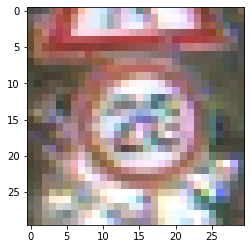

In [5]:
import matplotlib.pyplot as plt
img = Image.open(r'data\Train\0\00000_00001_00000.png') #Opening the image in order to show after reducing its size.
img = img.resize((30, 30)) #Reducing the size of image
sr = np.array(img) 
plt.imshow(img)
plt.show()

### Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split

#Splitting the training data into 80-20%
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


### Building the architecture of CNN

In [7]:
cnn = tf.keras.models.Sequential()
#Creating convolutional layer with 32 different feature detectors of size 5X5
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, activation = "relu", input_shape = x_train.shape[1:]))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, activation = "relu"))
#Creating pooling layer of size 2X2 to keep spatial invariance
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))
#To avoid overfitting
cnn.add(tf.keras.layers.Dropout(rate=0.25))

#Repeating the same procedure to make another set of Convolutional and Pooling layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))
cnn.add(tf.keras.layers.Dropout(rate=0.25))

#Flattening the map values to give input to the neural network.
cnn.add(tf.keras.layers.Flatten())

#Making hidden layer of neuron 256 units
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.5))

#Creating output layer for 43 different classes
cnn.add(tf.keras.layers.Dense(units = 43, activation = 'softmax'))

### Intializing and training the model

In [8]:
#Compiling with adam optimizer to implement stochastic technique to backpropagate the error.
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
#Training the model for total epochs of 15 having batch size of 64 images data.
cnn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, batch_size=64)

Epoch 1/15
491/491 [==============================] - 101s 206ms/step - loss: 2.4347 - accuracy: 0.3972 - val_loss: 0.8044 - val_accuracy: 0.8196
Epoch 2/15
491/491 [==============================] - 100s 205ms/step - loss: 0.7074 - accuracy: 0.7941 - val_loss: 0.1880 - val_accuracy: 0.9592
Epoch 3/15
491/491 [==============================] - 100s 204ms/step - loss: 0.4020 - accuracy: 0.8806 - val_loss: 0.1028 - val_accuracy: 0.9744
Epoch 4/15
491/491 [==============================] - 101s 206ms/step - loss: 0.2871 - accuracy: 0.9179 - val_loss: 0.0716 - val_accuracy: 0.9814
Epoch 5/15
491/491 [==============================] - 101s 205ms/step - loss: 0.2220 - accuracy: 0.9339 - val_loss: 0.0623 - val_accuracy: 0.9847
Epoch 6/15
491/491 [==============================] - 101s 206ms/step - loss: 0.2032 - accuracy: 0.9406 - val_loss: 0.0644 - val_accuracy: 0.9813
Epoch 7/15
491/491 [==============================] - 101s 205ms/step - loss: 0.1795 - accuracy: 0.9481 - val_loss: 0.0417 -

Total accuracy on training dataset = 96.36%

### Model Evaluation on Test dataset

In [21]:
import pandas as pd

#Evaluating on testing data
from sklearn.metrics import accuracy_score
test = pd.read_csv(r"D:\Deep Learning\Traffic Sign Identification\data\Test.csv")
test_img_path = "D:\Deep Learning\Traffic Sign Identification\data"
test_imgs = test['Path'].values
test_data = []
test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = cnn.predict_classes(test_data) #Making predictions

In [22]:
print(predictions)

[16  1 38 ...  6  7 10]


In [24]:
from sklearn.metrics import accuracy_score #To check the accuracy score.

In [29]:
test_labels = test['ClassId'].values

In [30]:
test_labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [31]:
accuracy_score(test_labels, predictions) #To predict accuracy.

0.9620744259699129

Total accuracy on testing dataset = 96.20%

Our model looks pretty solid because both the datasets accuracy are pretty close to each other which converges upto approx 96%

Training accuracy = 96.36%

Testing accuracy = 96.20%


### Deploying the model

In [37]:
from keras.models import model_from_json
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
